In [1]:
from qiskit import *
from qiskit import Aer
from qiskit.visualization import array_to_latex
import numpy as np

# Function to create and simulate the unitary matrix of a connected Quantum Circuit

In [2]:
def simulateConnectedCircuit(n):
    circ = QuantumCircuit(n)
    for i in range(0, n):
        for j in range(i+1,n):
            circ.cx(i,j)
    backend = Aer.get_backend('unitary_simulator')
    job = backend.run(circ)
    result = job.result()
    unitary = result.get_unitary(circ)
    return circ, unitary

# Create some constants for matrix algebra

In [3]:
ket0 = np.array([[1],[0]])
bra0 = np.array([1,0])
ket1 = np.array([[0],[1]])
bra1 = np.array([0,1])
I = np.identity(2)
X = np.array([[0,1],[1,0]])
ketbra0 = ket0*bra0
ketbra1 = ket1*bra1

# Function that calculates the linear algebra to find unitary matrix of the connected quantum circuit

In [4]:
def calculateUnitary(n):
    result = np.identity(2**n)
    #loop for each control bit or each calculation step
    for control_qubit in range(0,n-1):
        first = 1
        second = 1
        # Loop to Kron mulitply I or X gate for the target qubits
        for qubit in range(0,n-1-control_qubit):
            first = np.kron(first,I)
            second = np.kron(second,X)
        #Mulitply by ketbra of 0 and 1 for each term for the control qubit
        first = np.kron(first,ketbra0)
        second = np.kron(second,ketbra1)
        #Loop for qubits that are not changed in the setp therefore identity matrix used
        for qubit in range(0,control_qubit):
            first = np.kron(first,I)
            second = np.kron(second,I)
        step = first + second
        result = np.matmul(step,result)
    return result

# Create and draw the Circuit

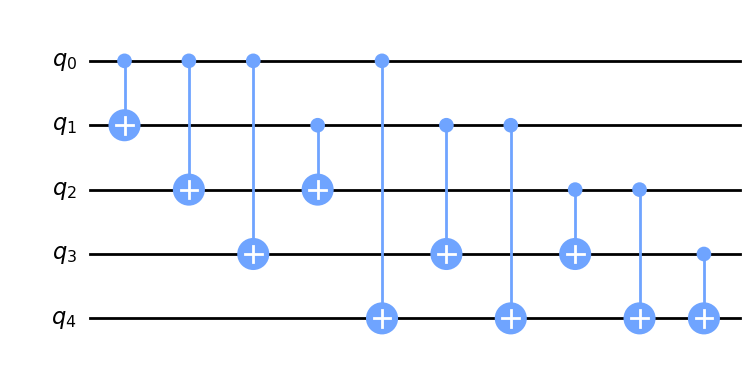

In [5]:
n = 5 #The number of qubits in the circuit, change depending on what cicuit is used.
circ, unitary = simulateConnectedCircuit(n)
circ.draw('mpl')

# Draw the simulated output unitary matrix of the circuit

In [6]:
array_to_latex(unitary, max_size=32)

<IPython.core.display.Latex object>

# Calculate the Unitary matrix and display it

In [7]:
result = calculateUnitary(n)
array_to_latex(unitary, max_size=32)

<IPython.core.display.Latex object>

# Compare weather the simulated Unitary matrix and the calculated matrix are equal

In [8]:
np.array_equal(unitary,result)

True

# Create, simulate, calculate and compare results for 10 qubit circuit

In [9]:
circ, unitary = simulateConnectedCircuit(10)
result = calculateUnitary(10)
np.array_equal(unitary, result)

True